<a href="https://colab.research.google.com/github/cisnux-seed/machine-learning-course/blob/main/week_14/vgg_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### NIM: 1103200032
### Nama: Fajra Risqulla
### Kelas: TK-44-06

Baris kode yang Anda tunjukkan adalah impor modul-modul yang umumnya digunakan dalam pembuatan dan pelatihan model menggunakan PyTorch untuk tugas-tugas pembelajaran mesin pada vision dan komputasi tensor. Mari kita bahas setiap barisnya:

1. `import torch`: Ini mengimpor modul utama dari PyTorch yang menyediakan fungsionalitas dasar seperti operasi tensor, fungsi matematika, dan komputasi GPU.

2. `import torch.nn as nn`: PyTorch menyediakan modul `torch.nn` untuk membangun dan melatih jaringan saraf (neural networks). `nn` berisi kelas-kelas yang memungkinkan pembuatan berbagai jenis layer neural network seperti layer linier, aktivasi, konvolusi, dll.

3. `import torch.optim as optim`: Modul `torch.optim` berisi berbagai algoritma optimisasi yang digunakan untuk melatih jaringan saraf. Ini termasuk SGD (Stochastic Gradient Descent), Adam, RMSProp, dan lainnya.

4. `import torchvision`: `torchvision` adalah sub-pustaka dari PyTorch yang berfokus pada komputer vision (pengolahan gambar). Ini menyediakan utilitas untuk bekerja dengan dataset gambar, transformasi, dan model-model terkenal dalam vision.

5. `import torchvision.transforms as transforms`: Modul ini berisi fungsi-fungsi yang memungkinkan transformasi pada data gambar, seperti rotasi, cropping, scaling, dan normalisasi.

6. `from torch.utils.data import DataLoader`: `DataLoader` adalah kelas dari PyTorch yang digunakan untuk memuat dataset dan mengirimkan batch-batch data ke model. Ini memfasilitasi proses pelatihan dengan membagi dataset ke dalam batch-batch yang dapat ditangani oleh model secara efisien.

7. `import matplotlib.pyplot as plt`: `matplotlib` adalah pustaka untuk visualisasi data dalam Python. `plt` adalah modul dari `matplotlib` yang digunakan untuk membuat plot, grafik, dan visualisasi data lainnya.

8. `import numpy as np`: `numpy` adalah pustaka yang menyediakan dukungan untuk array dan operasi matematika di Python. `np` adalah alias yang umum digunakan untuk `numpy`.

Dengan menggunakan impor dari modul-modul ini, Anda dapat membangun, melatih, dan mengevaluasi model neural network menggunakan PyTorch untuk berbagai macam tugas, terutama dalam konteks pengolahan gambar atau vision, namun juga dapat digunakan untuk berbagai tugas pembelajaran mesin lainnya. matplotlib dan numpy juga sering digunakan untuk analisis data dan visualisasi, serta memanipulasi array dan operasi matematika di Python.

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

Baris kode ini bertujuan untuk menentukan perangkat yang akan digunakan untuk komputasi saat menggunakan PyTorch. Lebih khusus lagi, baris kode ini akan menetapkan perangkat ke GPU jika GPU tersedia, dan jika tidak tersedia, akan menggunakan CPU sebagai perangkat komputasi.

Mari kita jelaskan lebih rinci:

1. `torch.cuda.is_available()`: Ini adalah fungsi yang disediakan oleh PyTorch untuk memeriksa ketersediaan GPU. Jika GPU tersedia pada sistem, fungsi ini akan mengembalikan nilai `True`; jika tidak, akan mengembalikan nilai `False`.

2. `"cuda" if torch.cuda.is_available() else "cpu"`: Ini adalah ekspresi kondisional Python yang menggunakan hasil dari `torch.cuda.is_available()` untuk memilih perangkat yang akan digunakan. Jika GPU tersedia, string `"cuda"` akan dipilih sebagai perangkat; jika tidak, string `"cpu"` akan dipilih sebagai perangkat.

3. `device = torch.device(...)`: Baris kode ini menggunakan nilai yang dipilih sebelumnya ("cuda" atau "cpu") untuk menetapkan perangkat yang akan digunakan dalam konteks komputasi PyTorch. Variabel `device` akan mewakili perangkat yang akan digunakan selama operasi PyTorch, memungkinkan penggunaan GPU jika tersedia atau beralih ke CPU jika tidak tersedia.

Pemilihan perangkat yang tepat untuk komputasi sangat penting saat menggunakan PyTorch, terutama dalam konteks pembelajaran mesin yang memerlukan perhitungan yang intensif. GPU memiliki kemampuan komputasi yang lebih cepat dan lebih besar daripada CPU dalam beberapa kasus, sehingga memanfaatkan GPU ketika tersedia dapat mempercepat proses pelatihan model. Namun demikian, dengan pengecualian kemampuan komputasi, PyTorch memungkinkan penggunaan keduanya (CPU dan GPU) untuk melakukan operasi komputasi pada model.

In [27]:
# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Kode yang Anda tunjukkan adalah definisi dari arsitektur jaringan neural VGGNet yang disesuaikan untuk digunakan dengan dataset MNIST. Arsitektur VGGNet awalnya diperkenalkan oleh Visual Graphics Group (VGG) di University of Oxford dan terkenal karena arsitekturnya yang terdiri dari beberapa lapisan konvolusi dan fully connected layers yang dalam.

Mari kita jelaskan baris per baris:

1. `class VGGNet(nn.Module):`: Ini adalah definisi kelas yang disebut `VGGNet`. Kelas ini merupakan turunan dari `nn.Module` di PyTorch, yang berarti kelas ini akan menjadi model neural network.

2. `def __init__(self):`: Metode `__init__` di dalam kelas `VGGNet` ini digunakan untuk mendefinisikan struktur model.

   a. `self.features = nn.Sequential(...)`:
      - `nn.Sequential` adalah urutan dari beberapa lapisan neural network yang dijalankan berurutan satu sama lain.
      - Ini adalah bagian dari model yang berisi lapisan-lapisan konvolusi, aktivasi ReLU, dan max pooling. Lapisan-lapisan ini membentuk bagian fitur (feature extraction) dari model.

   b. `self.avgpool = nn.AdaptiveAvgPool2d((7, 7))`:
      - `nn.AdaptiveAvgPool2d` adalah lapisan yang menyesuaikan rata-rata pooling berdasarkan ukuran yang ditentukan.
      - Lapisan ini mengubah ukuran keluaran dari bagian fitur menjadi (7, 7).

   c. `self.classifier = nn.Sequential(...)`:
      - Bagian ini berisi lapisan-lapisan yang terkait dengan klasifikasi.
      - Terdiri dari lapisan-lapisan fully connected (Linear), aktivasi ReLU, dan dropout.

3. `def forward(self, x):`: Metode `forward` mendefinisikan aliran maju (forward pass) melalui jaringan. Operasi ini terjadi saat input data diteruskan melalui model.

   a. `x = self.features(x)`: Melakukan operasi feature extraction menggunakan lapisan-lapisan konvolusi, aktivasi ReLU, dan max pooling yang telah didefinisikan sebelumnya.

   b. `x = self.avgpool(x)`: Melakukan adaptive average pooling pada output dari bagian fitur untuk mengubah ukurannya menjadi (7, 7).

   c. `x = x.view(x.size(0), -1)`: Mengubah dimensi tensor untuk disesuaikan dengan fully connected layer.

   d. `x = self.classifier(x)`: Melakukan operasi klasifikasi menggunakan lapisan-lapisan fully connected yang telah didefinisikan sebelumnya.

   e. `return x`: Mengembalikan output hasil dari proses forward pass.

Ini adalah implementasi dari arsitektur jaringan neural VGGNet yang dimodifikasi untuk digunakan dalam tugas pengenalan digit dari dataset MNIST dalam konteks PyTorch. Arsitektur ini memiliki lapisan-lapisan konvolusi dan fully connected yang telah terbukti efektif dalam beberapa tugas komputer vision.

In [28]:
# Define the VGGNet architecture for MNIST
class VGGNet(nn.Module):
    def __init__(self):
        super(VGGNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Linear(256 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 10),  # 10 classes for MNIST
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

Kode ini bertujuan untuk memuat dataset MNIST menggunakan PyTorch. Dataset MNIST adalah dataset standar yang sering digunakan dalam pembelajaran mesin untuk tugas pengenalan digit tulisan tangan dari gambar berukuran 28x28 piksel.

Mari kita jelaskan baris per baris:

1. `transform = transforms.Compose([...])`: Ini adalah proses transformasi yang akan diterapkan pada setiap sampel dari dataset MNIST sebelum dimasukkan ke dalam model. Transformasi yang dilakukan adalah:

   - `transforms.Resize((28, 28))`: Mengubah ukuran gambar menjadi 28x28 piksel. Dalam hal ini, gambar MNIST yang aslinya berukuran 28x28 piksel tetap dipertahankan ukurannya.

   - `transforms.ToTensor()`: Mengubah gambar menjadi tensor PyTorch. Transformasi ini memungkinkan gambar dalam format yang cocok untuk diolah oleh model neural network.

2. `train_dataset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)`: Ini adalah pengaturan dataset pelatihan. Fungsi `torchvision.datasets.MNIST` digunakan untuk mengunduh dataset MNIST jika belum ada atau memuatnya dari direktori yang telah ditentukan (`root="./data"`). `train=True` menunjukkan bahwa dataset pelatihan akan dimuat. Transformasi yang telah ditentukan sebelumnya akan diterapkan pada dataset ini.

3. `test_dataset = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)`: Ini adalah pengaturan dataset pengujian. Sama seperti sebelumnya, namun dengan `train=False`, yang berarti dataset pengujian akan dimuat. Transformasi yang sama akan diterapkan pada dataset pengujian juga.

4. `train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)`: `DataLoader` digunakan untuk memuat dataset dan membaginya menjadi batch-batch yang akan digunakan untuk pelatihan model. `train_loader` adalah loader untuk dataset pelatihan. Parameter `batch_size=64` menunjukkan bahwa setiap batch akan berisi 64 sampel. `shuffle=True` menyebabkan pengacakan data pada setiap epoch (perulangan) selama pelatihan.

5. `test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)`: `test_loader` adalah loader untuk dataset pengujian. Sama seperti sebelumnya, namun dengan `shuffle=False`, sehingga data pengujian tidak diacak.

Dengan menggunakan kode ini, dataset MNIST telah dimuat dan dipersiapkan dalam format yang sesuai untuk digunakan dalam pelatihan dan evaluasi model neural network pada tugas pengenalan digit dari gambar-gambar tulisan tangan. DataLoader akan memudahkan penggunaan dataset ini saat melatih model, mengelola batch-batch data untuk iterasi selama proses pelatihan.

In [29]:
# Load MNIST dataset
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

Baris kode yang Anda tunjukkan bertujuan untuk menginisialisasi model neural network, fungsi kerugian (loss function), dan algoritma optimisasi yang akan digunakan saat melatih model VGGNet untuk tugas klasifikasi pada dataset MNIST.

Mari kita bahas setiap barisnya:

1. `model = VGGNet().to(device)`: Kode ini membuat instance dari model VGGNet yang telah Anda definisikan sebelumnya. `VGGNet()` akan memanggil konstruktor dari kelas `VGGNet` yang merupakan model neural network yang digunakan untuk melakukan klasifikasi pada dataset MNIST. Kemudian, `.to(device)` digunakan untuk memindahkan model ke perangkat yang telah ditentukan sebelumnya (GPU atau CPU) untuk melakukan komputasi.

2. `criterion = nn.CrossEntropyLoss()`: Inisialisasi fungsi kerugian (loss function) untuk perhitungan kesalahan (error) selama pelatihan. `nn.CrossEntropyLoss()` adalah fungsi kerugian yang cocok untuk tugas klasifikasi dengan banyak kelas seperti dalam dataset MNIST. Fungsi ini akan menghitung kesalahan antara prediksi model dan label yang sebenarnya.

3. `optimizer = optim.Adam(model.parameters(), lr=0.001)`: Inisialisasi algoritma optimisasi, dalam hal ini menggunakan algoritma Adam, untuk mengoptimalkan parameter-parameter dari model. `model.parameters()` memberikan parameter-parameter yang akan dioptimalkan oleh algoritma. `lr=0.001` adalah laju pembelajaran (learning rate) yang digunakan oleh algoritma Adam untuk menyesuaikan parameter.

Dengan inisialisasi model, fungsi kerugian, dan optimizer, Anda telah menyiapkan model VGGNet untuk dilatih pada dataset MNIST dengan algoritma optimisasi Adam dan menggunakan fungsi kerugian Cross Entropy Loss. Langkah ini merupakan tahap persiapan sebelum memulai proses pelatihan, di mana model akan diperbarui berulang kali pada setiap batch data untuk meningkatkan kemampuannya dalam mengklasifikasikan gambar-gambar digit pada dataset MNIST.

In [30]:
# Initialize model, loss function, and optimizer
model = VGGNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Kode yang Anda tunjukkan adalah bagian dari proses pelatihan (training) model menggunakan dataset pelatihan pada model VGGNet untuk tugas klasifikasi gambar digit MNIST.

Mari kita jelaskan baris per baris:

1. `num_epochs = 5`: Variabel `num_epochs` menunjukkan jumlah putaran pelatihan yang akan dilakukan pada dataset pelatihan. Dalam kasus ini, Anda telah menetapkan jumlah epoch sebanyak 5.

2. `for epoch in range(num_epochs):`: Loop `for` ini akan berjalan sebanyak `num_epochs`, yaitu 5 kali dalam contoh Anda.

   a. `model.train()`: Metode `model.train()` digunakan untuk menetapkan model ke mode pelatihan. Beberapa lapisan, seperti dropout dan batch normalization, berperilaku berbeda antara mode pelatihan dan evaluasi. Dengan memanggil `model.train()`, model akan disetel untuk mode pelatihan.

   b. `total_loss = 0.0`: Variabel `total_loss` diinisialisasi untuk menyimpan total loss pada setiap epoch.

   c. Loop `for inputs, labels in train_loader:`: Ini adalah loop yang mengiterasi melalui setiap batch dalam `train_loader`, yang memuat dataset pelatihan dalam batch-batch kecil.

      - `inputs, labels = inputs.to(device), labels.to(device)`: Memindahkan data masukan (inputs) dan label ke perangkat yang telah ditentukan sebelumnya (GPU atau CPU) untuk komputasi.

      - `optimizer.zero_grad()`: Mengatur gradien parameter ke nol sebelum melakukan perhitungan gradien dalam setiap iterasi. Hal ini penting karena PyTorch akan mengakumulasi gradien pada setiap iterasi jika tidak diatur ke nol.

      - `outputs = model(inputs)`: Mendapatkan prediksi dari model untuk batch saat ini.

      - `loss = criterion(outputs, labels)`: Menghitung loss atau kesalahan antara prediksi model dan label yang sebenarnya.

      - `loss.backward()`: Melakukan backpropagation untuk menghitung gradien loss function terhadap parameter-parameter model.

      - `optimizer.step()`: Melakukan langkah optimisasi, yaitu memperbarui parameter-parameter model berdasarkan gradien yang dihitung sebelumnya.

      - `total_loss += loss.item()`: Menambahkan loss dari batch saat ini ke `total_loss` untuk menghitung rata-rata loss per epoch.

   d. `print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_loader)}")`: Mencetak rata-rata loss untuk setiap epoch. Loss ini adalah `total_loss` dibagi dengan jumlah batch dalam `train_loader`.

Proses ini adalah inti dari pelatihan model neural network. Dengan menjalankan proses ini, model secara iteratif diperbarui dan disesuaikan dengan data pelatihan untuk meningkatkan performa dan kemampuannya dalam mengklasifikasikan gambar-gambar digit pada dataset MNIST. Output yang ditampilkan merupakan informasi tentang rata-rata loss yang dihasilkan oleh model pada setiap epoch selama proses pelatihan.

In [31]:
# Training
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_loader)}")

Epoch 1/5, Loss: 0.29633119316753753
Epoch 2/5, Loss: 0.08247652990785219
Epoch 3/5, Loss: 0.06642747656901123
Epoch 4/5, Loss: 0.05605437267069786
Epoch 5/5, Loss: 0.05006799564549406


Kode yang Anda tunjukkan adalah bagian dari proses evaluasi model setelah proses pelatihan selesai menggunakan dataset pengujian (test set). Tujuannya adalah untuk mengukur akurasi model pada data yang belum pernah dilihat sebelumnya.

Mari kita jelaskan baris per baris:

1. `model.eval()`: Metode `model.eval()` digunakan untuk menetapkan model ke mode evaluasi. Beberapa lapisan, seperti dropout dan batch normalization, berperilaku berbeda antara mode pelatihan dan evaluasi. Dengan memanggil `model.eval()`, model akan disetel untuk mode evaluasi.

2. `total_correct = 0` dan `total_samples = 0`: Variabel ini digunakan untuk menghitung jumlah prediksi yang benar dan jumlah total sampel yang dievaluasi.

3. `with torch.no_grad():`: Ini adalah blok kode yang menunjukkan bahwa dalam evaluasi ini, tidak perlu melacak gradien. Hal ini dilakukan untuk menghemat memori dan waktu komputasi karena gradien tidak diperlukan saat melakukan evaluasi.

4. Loop `for inputs, labels in test_loader:`: Ini adalah loop yang mengiterasi melalui setiap batch dalam `test_loader`, yang memuat dataset pengujian dalam batch-batch kecil.

   a. `inputs, labels = inputs.to(device), labels.to(device)`: Memindahkan data masukan (inputs) dan label ke perangkat yang telah ditentukan sebelumnya (GPU atau CPU) untuk komputasi.

   b. `outputs = model(inputs)`: Mendapatkan prediksi dari model untuk batch saat ini.

   c. `_, predictions = torch.max(outputs, 1)`: Menggunakan `torch.max()` untuk mendapatkan indeks kelas yang memiliki probabilitas tertinggi. Dalam hal ini, yang diambil adalah indeks dari kelas dengan nilai probabilitas terbesar.

   d. `(predictions == labels).sum().item()`: Menghitung jumlah prediksi yang benar dengan membandingkan prediksi model dengan label yang sebenarnya, kemudian menjumlahkannya. `.sum()` digunakan untuk menghitung jumlah elemen True (prediksi yang benar), dan `.item()` mengambil nilai hasilnya.

   e. `total_correct += (predictions == labels).sum().item()`: Menambahkan jumlah prediksi yang benar dari batch saat ini ke total_correct.

   f. `total_samples += labels.size(0)`: Menambahkan jumlah sampel dalam batch saat ini ke total_samples.

5. `accuracy = total_correct / total_samples`: Menghitung akurasi model dengan membagi jumlah prediksi yang benar dengan jumlah total sampel yang dievaluasi.

6. `print(f"Test Accuracy: {accuracy}")`: Mencetak akurasi model pada dataset pengujian.

Proses ini adalah tahap evaluasi setelah pelatihan selesai. Dengan menggunakan dataset pengujian yang terpisah, Anda dapat mengevaluasi seberapa baik model Anda dapat melakukan prediksi pada data baru yang tidak pernah dilihat selama proses pelatihan. Output yang dihasilkan adalah akurasi model pada dataset pengujian, yang memberikan gambaran tentang seberapa baik model dapat menggeneralisasi pada data yang belum pernah dilihat sebelumnya.

In [32]:
# Testing
model.eval()
total_correct = 0
total_samples = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, predictions = torch.max(outputs, 1)

        total_correct += (predictions == labels).sum().item()
        total_samples += labels.size(0)

accuracy = total_correct / total_samples
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.9868


In [33]:
# Function to display images with labels
def imshow(img, title):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

Kode ini bertujuan untuk mendapatkan sebuah batch data uji dari loader data uji (test_loader) yang telah dibuat sebelumnya untuk dataset MNIST. Kode ini digunakan untuk mengekstrak dan menampilkan contoh gambar-gambar dan label-label yang terkait dari batch tersebut.

Mari kita jelaskan baris per baris:

1. `dataiter = iter(test_loader)`: `iter(test_loader)` mengubah `test_loader`, yang merupakan objek DataLoader, menjadi iterator. Iterator ini digunakan untuk mengakses batch-batch data dalam suatu perulangan.

2. `data = next(dataiter)`: `next(dataiter)` digunakan untuk mendapatkan satu batch data dari iterator yang telah dibuat sebelumnya. Dalam hal ini, variabel `data` akan berisi satu batch data dari dataset pengujian (test set).

3. `images, labels = next(dataiter)`: Kode ini bertujuan untuk mengambil kembali batch data berikutnya dari iterator. Dalam kode ini, `images` akan berisi batch gambar, dan `labels` akan berisi label-label yang sesuai dengan gambar-gambar tersebut. Namun, pada tahap ini, `dataiter` telah digunakan sebelumnya, sehingga pengambilan batch data yang kedua tidak diperlukan dan membutuhkan variabel `data` yang sudah ada sebelumnya.

4. `images, labels = images.to(device), labels.to(device)`: Langkah ini memindahkan batch gambar dan label ke perangkat yang telah ditentukan sebelumnya (GPU atau CPU) untuk komputasi. Biasanya, ini dilakukan sebelum melakukan proses forward pass pada model untuk memastikan bahwa data siap untuk digunakan pada perangkat yang sesuai.

Dengan menggunakan kode ini, Anda dapat mengambil batch data uji dari loader data uji (test_loader) yang sudah disiapkan sebelumnya, kemudian menggunakan data ini untuk melakukan evaluasi model, visualisasi, atau tindakan lainnya yang relevan terhadap dataset uji MNIST yang dimuat.

In [34]:
# Get a batch of test data
dataiter = iter(test_loader)
data = next(dataiter)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

Kode yang Anda tunjukkan bertujuan untuk membuat prediksi menggunakan model yang telah dilatih pada batch data uji yang telah dimuat sebelumnya dari dataset MNIST.

Mari kita jelaskan baris per baris:

1. `outputs = model(images)`: Baris ini melakukan forward pass (proses prediksi) pada model neural network dengan menggunakan batch gambar (`images`) dari dataset uji.
   
   - `model(images)`: Memasukkan batch gambar ke dalam model yang telah dilatih (VGGNet, AlexNet, atau model lain yang telah dibuat sebelumnya). Ini menghasilkan prediksi atau output dari model.

2. `_, predicted = torch.max(outputs, 1)`: Dalam baris ini, dilakukan pemrosesan terhadap output yang dihasilkan oleh model.
   
   - `torch.max(outputs, 1)`: Fungsi `torch.max()` digunakan untuk mengambil nilai maksimum dari tensor `outputs` pada dimensi yang ditentukan (dimensi ke-1 dalam kasus ini). Di sini, `outputs` berisi hasil prediksi dari model terhadap batch gambar.
   
   - `_`: Variabel yang digunakan untuk menampung nilai maksimum yang sebenarnya tidak digunakan. Ini biasanya diabaikan dengan menggunakan garis bawah `_` dalam Python.
   
   - `predicted`: Variabel yang akan berisi indeks kelas dengan nilai maksimum (prediksi yang dihasilkan oleh model) untuk setiap sampel dalam batch.

Setelah langkah-langkah ini, variabel `predicted` akan berisi prediksi yang dihasilkan oleh model terhadap setiap gambar dalam batch data uji. Prediksi ini dalam bentuk indeks kelas, yang dapat digunakan untuk mengevaluasi kinerja model, melakukan analisis lebih lanjut, atau menampilkan hasil prediksi yang diperoleh dari model terhadap dataset uji MNIST.

In [35]:
# Make predictions
outputs = model(images)
_, predicted = torch.max(outputs, 1)

Kode yang Anda tunjukkan bertujuan untuk memisahkan indeks gambar-gambar yang telah diprediksi dengan benar oleh model dari indeks gambar-gambar yang diprediksi dengan kesalahan.

Mari kita jelaskan baris per baris:

1. `correct_pred_indices = (predicted == labels).nonzero().squeeze()`: Baris ini bertujuan untuk mengidentifikasi indeks gambar-gambar yang diprediksi dengan benar oleh model. Mari kita jelaskan komponennya:

   - `(predicted == labels)`: Ini adalah operasi perbandingan antara prediksi model (`predicted`) dan label sebenarnya (`labels`). Jika prediksi model sesuai dengan label sebenarnya, maka kondisi ini menghasilkan tensor boolean yang berisi `True`. Jika tidak sesuai, kondisi ini menghasilkan `False`.

   - `.nonzero()`: Metode `nonzero()` digunakan untuk mendapatkan indeks dari elemen-elemen yang memiliki nilai True (non-zero) dari tensor boolean yang dihasilkan sebelumnya.

   - `.squeeze()`: Metode `squeeze()` digunakan untuk menghapus dimensi yang tidak diperlukan dari tensor hasil `nonzero()`. Hal ini dilakukan untuk mendapatkan indeks dalam bentuk yang lebih sederhana dan mudah diakses.

   - `correct_pred_indices`: Variabel yang akan berisi indeks dari gambar-gambar yang diprediksi dengan benar oleh model.

2. `incorrect_pred_indices = (predicted != labels).nonzero().squeeze()`: Baris ini bertujuan untuk mengidentifikasi indeks gambar-gambar yang diprediksi dengan kesalahan oleh model.

   - `(predicted != labels)`: Ini adalah operasi perbandingan yang sama seperti sebelumnya, tetapi kali ini, kita memeriksa apakah prediksi model tidak sama dengan label sebenarnya. Jika kondisi ini benar, maka elemen tensor boolean ini akan menjadi `True`.

   - `.nonzero()` dan `.squeeze()` memiliki fungsi yang sama seperti yang dijelaskan sebelumnya, digunakan untuk mendapatkan indeks dari gambar-gambar yang diprediksi dengan kesalahan.

Dengan menggunakan kedua baris kode ini, Anda dapat memisahkan indeks dari gambar-gambar yang telah diprediksi dengan benar dan yang diprediksi dengan kesalahan oleh model, yang dapat digunakan untuk visualisasi, analisis, atau tindakan lainnya terkait dengan performa model pada dataset uji MNIST.

In [36]:
# Display images with predictions
correct_pred_indices = (predicted == labels).nonzero().squeeze()
incorrect_pred_indices = (predicted != labels).nonzero().squeeze()

Teks yang Anda tunjukkan adalah bagian dari kode yang bertujuan untuk menampilkan beberapa gambar yang telah diprediksi dengan benar oleh model pada dataset uji MNIST beserta label sebenarnya dan label yang diprediksi oleh model.

Mari kita jelaskan baris per baris:

1. `print("Correctly Classified Images:")`: Ini adalah pernyataan cetak yang bertujuan untuk memberikan informasi kepada pengguna bahwa gambar-gambar yang akan ditampilkan adalah gambar-gambar yang telah diprediksi dengan benar oleh model.

2. `for i in range(3):`: Ini adalah loop `for` yang berjalan tiga kali, karena jumlah iterasi ditetapkan sebanyak 3 dalam `range(3)`. Pada setiap iterasi, akan ditampilkan satu gambar yang telah diprediksi dengan benar.

3. `index = correct_pred_indices[i]`: Variabel `index` diisi dengan indeks dari gambar yang diprediksi dengan benar ke-i dari `correct_pred_indices`. Ini memastikan bahwa dalam setiap iterasi, variabel `index` akan berisi indeks gambar yang berbeda yang telah diprediksi dengan benar oleh model.

4. `imshow(images[index].cpu(), f"True: {labels[index].item()}, Predicted: {predicted[index].item()}")`: Kode ini memanggil fungsi `imshow()` untuk menampilkan gambar yang telah diprediksi dengan benar beserta informasi label sebenarnya dan label yang diprediksi oleh model.

   - `images[index].cpu()`: Mengambil gambar dari batch gambar pada indeks `index` dan menggunakan `.cpu()` untuk memindahkan gambar ke CPU jika awalnya diolah di GPU.

   - `f"True: {labels[index].item()}, Predicted: {predicted[index].item()}"`: Mencetak informasi yang terdiri dari label sebenarnya (`labels[index].item()`) dan label yang diprediksi oleh model (`predicted[index].item()`).

Dengan menjalankan loop ini sebanyak tiga kali, Anda dapat melihat tiga gambar yang diprediksi dengan benar oleh model, bersama dengan label sebenarnya dan label yang diprediksi. Ini membantu dalam mengevaluasi kinerja model dan memberikan gambaran bagaimana model dapat mengenali gambar-gambar dalam dataset uji MNIST.

Correctly Classified Images:


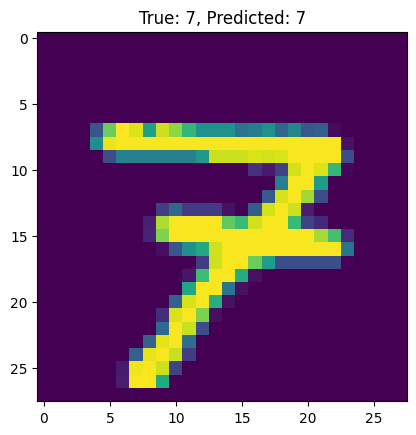

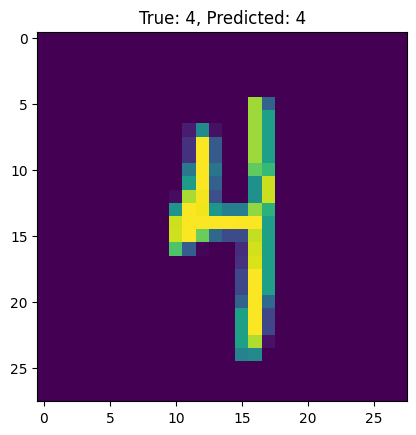

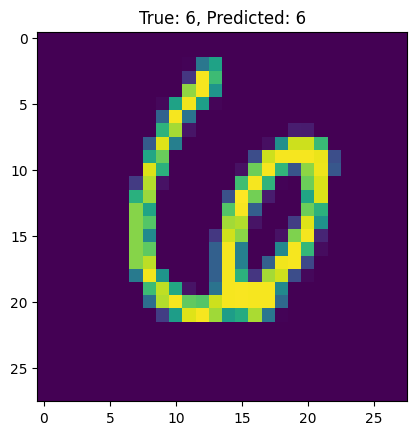

In [37]:
# Display correct predictions
print("Correctly Classified Images:")
for i in range(3):
    index = correct_pred_indices[i]
    imshow(images[index].cpu(), f"True: {labels[index].item()}, Predicted: {predicted[index].item()}")

Kode ini bertujuan untuk menampilkan beberapa gambar yang telah diprediksi dengan benar oleh model dari dataset uji MNIST, bersama dengan label sebenarnya dan label yang diprediksi oleh model.

Mari kita jelaskan baris per baris:

1. `print("Correctly Classified Images:")`: Ini adalah pernyataan cetak yang digunakan untuk memberi judul atau informasi kepada pengguna bahwa gambar-gambar yang akan ditampilkan adalah gambar yang telah diprediksi dengan benar oleh model.

2. `for i in range(3):`: Ini adalah loop `for` yang akan berjalan sebanyak 3 kali. Pada setiap iterasi, gambar yang diprediksi dengan benar akan ditampilkan.

3. `index = correct_pred_indices[i]`: Variabel `index` diisi dengan indeks dari gambar yang diprediksi dengan benar yang ke-i dari `correct_pred_indices`. Pada setiap iterasi, variabel `i` digunakan untuk mendapatkan indeks dari gambar yang berbeda yang telah diprediksi dengan benar.

4. `imshow(images[index].cpu(), f"True: {labels[index].item()}, Predicted: {predicted[index].item()}")`: Kode ini memanggil fungsi `imshow()` untuk menampilkan gambar yang diprediksi dengan benar beserta informasi label sebenarnya dan label yang diprediksi oleh model.

   - `images[index].cpu()`: Mengambil gambar dari batch gambar pada indeks `index` dan menggunakan `.cpu()` untuk memindahkan gambar ke CPU jika awalnya diolah di GPU.

   - `f"True: {labels[index].item()}, Predicted: {predicted[index].item()}"`: Mencetak informasi yang terdiri dari label sebenarnya (`labels[index].item()`) dan label yang diprediksi oleh model (`predicted[index].item()`).

Dengan menjalankan loop ini, beberapa gambar dari dataset uji yang telah diprediksi dengan benar oleh model akan ditampilkan bersama dengan informasi label sebenarnya dan label yang diprediksi. Ini membantu dalam menganalisis performa model dan melihat seberapa baik model dapat mengenali gambar-gambar yang ada dalam dataset uji MNIST.

Incorrectly Classified Images:


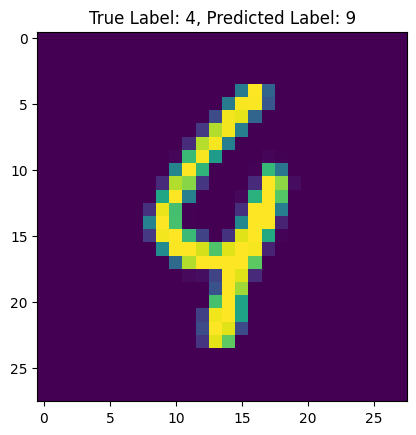

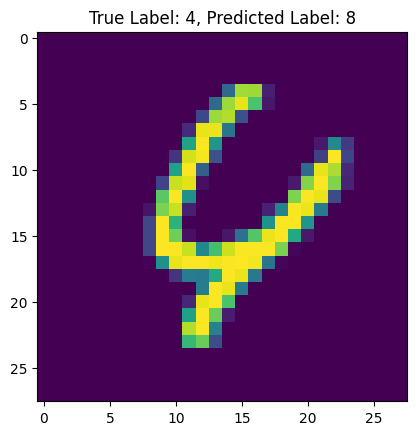

In [38]:
# Check if the array or tensor is not empty before accessing elements
if len(incorrect_pred_indices) > 0:
    # Display incorrectly classified predictions
    print("Incorrectly Classified Images:")
    for i in range(min(3, len(incorrect_pred_indices))):  # Ensure not to go beyond the available indices
        index = incorrect_pred_indices[i]
        true_label = labels[index].item()
        predicted_label = predicted[index].item()

        # Display the image along with true and predicted labels
        imshow(images[index].cpu(), f"True Label: {true_label}, Predicted Label: {predicted_label}")
else:
    print("No incorrectly classified images to display.")